#### Import of libraries and uploading dataset from csv file

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
raw_data = pd.read_csv("/home/student/Pulpit/nypd.csv", low_memory=False)

#### Number of all people injured or killed in accidents will be summed.

In [16]:
col_list = ["NUMBER OF PERSONS KILLED","NUMBER OF PEDESTRIANS KILLED","NUMBER OF CYCLIST KILLED","NUMBER OF MOTORIST KILLED"]
raw_data["TOTAL KILLED"]=raw_data[col_list].sum(axis=1)
col_list2 = ["NUMBER OF PERSONS INJURED","NUMBER OF PEDESTRIANS INJURED","NUMBER OF CYCLIST INJURED","NUMBER OF MOTORIST INJURED"]
raw_data["TOTAL INJURED"]=raw_data[col_list2].sum(axis=1)

#### There is significant amount of accidents, that was not asigned to any specified borough. In the future, it will be nessesary to verify the location data (lattitude.longitude) and fill the NaNs in Borough column.

In [17]:
raw_data['BOROUGH']=raw_data['BOROUGH'].fillna(value="UNSPECIFIED")

#### Selecting columns relevant for analysed problem.

In [32]:
data = raw_data[["BOROUGH","CONTRIBUTING FACTOR VEHICLE 1","CONTRIBUTING FACTOR VEHICLE 2","CONTRIBUTING FACTOR VEHICLE 3","CONTRIBUTING FACTOR VEHICLE 4","CONTRIBUTING FACTOR VEHICLE 5", "TOTAL KILLED", "TOTAL INJURED"]]

#### As serious accident were taken only accidents in which any person were killed or in which at least 10 people were injured.

In [57]:
mask1 = data["TOTAL KILLED"] <=1.0
mask2 = data["TOTAL INJURED"] <= 10.0
data = data[~mask1 | ~mask2]

In [72]:
boroughs = ["BROOKLYN","BRONX","MANHATTAN","QUEENS","STATEN ISLAND"]
borough_data={"BROOKLYN" : [], "BRONX":[], "MANHATTAN":[],"QUEENS": [], "STATEN ISLAND":[]}
factors = {"BROOKLYN" : [], "BRONX":[], "MANHATTAN":[],"QUEENS": [], "STATEN ISLAND":[]}
factors_renamed={"BROOKLYN" : [], "BRONX":[], "MANHATTAN":[],"QUEENS": [], "STATEN ISLAND":[]}
for i in range (0,5):
    borough_name = boroughs[i]
    borough_data[borough_name] = data.loc[data['BOROUGH'] == borough_name]
    for i in range (1,6):
        column_name = "CONTRIBUTING FACTOR VEHICLE "+str(i)
        factors[borough_name].append(pd.Series(borough_data[borough_name].value_counts(column_name)).reset_index())
        factors_renamed[borough_name].append(factors[borough_name][i-1].rename(columns={column_name:"FACTOR","count":"COUNT"}))



In [84]:
merged_list_of_factors = pd.concat([factors_renamed['MANHATTAN'][0],
                                    factors_renamed['MANHATTAN'][1],
                                    factors_renamed['MANHATTAN'][2],
                                    factors_renamed['MANHATTAN'][3],
                                    factors_renamed['MANHATTAN'][4]], ignore_index=True)

grouped_list_after_merging = pd.DataFrame(merged_list_of_factors.groupby(by='FACTOR').sum())
sorted_list = grouped_list_after_merging.sort_values(by='COUNT',ascending=False)
sorted_list_dropped=sorted_list.drop(labels='Unspecified')
most_dangerous_factors_for_manhattan = pd.DataFrame(sorted_list_dropped.head(3))

In [85]:
merged_list_of_factors = pd.concat([factors_renamed['QUEENS'][0],
                                    factors_renamed['QUEENS'][1],
                                    factors_renamed['QUEENS'][2],
                                    factors_renamed['QUEENS'][3],
                                    factors_renamed['QUEENS'][4]], ignore_index=True)
grouped_list_after_merging = pd.DataFrame(merged_list_of_factors.groupby(by='FACTOR').sum())
sorted_list = grouped_list_after_merging.sort_values(by='COUNT',ascending=False)
sorted_list_dropped=sorted_list.drop(labels='Unspecified')
most_dangerous_factors_for_queens = pd.DataFrame(sorted_list_dropped.head(3))

In [86]:
merged_list_of_factors = pd.concat([factors_renamed['BRONX'][0],
                                    factors_renamed['BRONX'][1],
                                    factors_renamed['BRONX'][2],
                                    factors_renamed['BRONX'][3],
                                    factors_renamed['BRONX'][4]], ignore_index=True)
grouped_list_after_merging = pd.DataFrame(merged_list_of_factors.groupby(by='FACTOR').sum())
sorted_list = grouped_list_after_merging.sort_values(by='COUNT',ascending=False)
sorted_list_dropped=sorted_list.drop(labels='Unspecified')
most_dangerous_factors_for_bronx = pd.DataFrame(sorted_list_dropped.head(3))

In [87]:
merged_list_of_factors = pd.concat([factors_renamed['BROOKLYN'][0],
                                    factors_renamed['BROOKLYN'][1],
                                    factors_renamed['BROOKLYN'][2],
                                    factors_renamed['BROOKLYN'][3],
                                    factors_renamed['BROOKLYN'][4]], ignore_index=True)

grouped_list_after_merging = pd.DataFrame(merged_list_of_factors.groupby(by='FACTOR').sum())
sorted_list = grouped_list_after_merging.sort_values(by='COUNT',ascending=False)
sorted_list_dropped=sorted_list.drop(labels='Unspecified')
most_dangerous_factors_for_brooklyn = pd.DataFrame(sorted_list_dropped.head(3))

In [91]:
merged_list_of_factors = pd.concat([factors_renamed['STATEN ISLAND'][0],
                                    factors_renamed['STATEN ISLAND'][1],
                                    factors_renamed['STATEN ISLAND'][2],
                                    factors_renamed['STATEN ISLAND'][3],
                                    factors_renamed['STATEN ISLAND'][4]], ignore_index=True)
grouped_list_after_merging = pd.DataFrame(merged_list_of_factors.groupby(by='FACTOR').sum())
sorted_list = grouped_list_after_merging.sort_values(by='COUNT',ascending=False)
sorted_list_dropped=sorted_list.drop(labels='Unspecified')
most_dangerous_factors_for_staten_island = pd.DataFrame(sorted_list_dropped.head(3))

In [92]:
most_dangerous_factors_for_staten_island.insert(0,"BOROUGH",["Staten Island","Staten Island","Staten Island"])
most_dangerous_factors_for_bronx.insert(0,"BOROUGH",["Bronx","Bronx","Bronx"])
most_dangerous_factors_for_queens.insert(0,"BOROUGH",["Queens","Queens","Queens"])
most_dangerous_factors_for_manhattan.insert(0,"BOROUGH",["Manhattan","Manhattan","Manhattan"])
most_dangerous_factors_for_brooklyn.insert(0,"BOROUGH",["Brooklyn","Brooklyn","Brooklyn"])
merged_list = pd.concat([most_dangerous_factors_for_staten_island,
                         most_dangerous_factors_for_queens,
                         most_dangerous_factors_for_brooklyn,
                         most_dangerous_factors_for_bronx,
                         most_dangerous_factors_for_manhattan])
merged_list["FACTOR IN BOROUGH"]=merged_list['BOROUGH']+', '+merged_list.index

ValueError: cannot insert BOROUGH, already exists

### Preparing data for plot

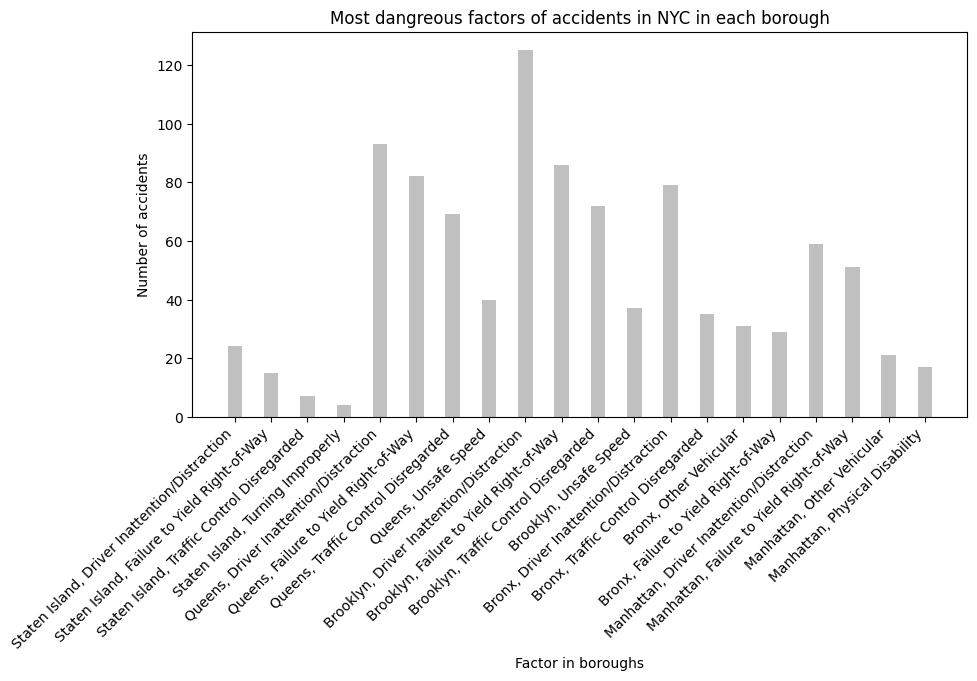

In [83]:
x = merged_list["FACTOR IN BOROUGH"]
y = merged_list["COUNT"]
fig = plt.figure(figsize = (10, 5))

plt.bar(x, y, color ='#C0C0C0', width = 0.4)
 
plt.xlabel("Factor in boroughs")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of accidents")
plt.ticklabel_format(style='plain', axis="y")
plt.title("Most dangreous factors of accidents in NYC in each borough")
plt.show()